Please **submit this Jupyter notebook through Canvas** no later than **Monday November 19, 12:59**, before the start of the lecture.

Homework is in **groups of two**, and you are expected to hand in original work. Work that is copied from another group will not be accepted.

# Exercise 0
Write down the names + student ID of the people in your group.

Tharangni H Sivaji (11611065)

-----
# Exercise 1

# (a)
We have the table of data in the next cell.

Using `numpy.linalg.lstsq()`, fit a straight line, a quadratic function, and a cubic function to these data. Plot the data and your fitted functions in a graph.

In [1]:
import sys
import random
import warnings
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1000)
warnings.simplefilter('ignore', np.RankWarning)

In [2]:
t = np.array([3, 11, 29, 32, 47, 63, 73, 99], dtype=np.float)
w = np.array([74, 72, 52, 35, 37, 20, 19, 19], dtype=np.float)

In [3]:
def vandermonde_matrix(t, order):
    '''
    t: data points
    order: order of the function to fit the data (1, ..., n)
        1: straight line
        2: quadratic
        3: cubic 
    returns: v_matrix: respective vandermonde matrix as defined in ch3
    '''
    v_matrix = np.ones((len(t), order+1), dtype = t.dtype)

    for i in range(len(t)):
        for j in range(order):
            v_matrix[i, j] = np.power(t[i], abs(j-order))
    
    return v_matrix

In [4]:
A1 = vandermonde_matrix(t, 1)
a1, b1 = np.linalg.lstsq(A1, w, rcond = None)[0]

In [5]:
A2 = vandermonde_matrix(t, 2)
a2, b2, c2 = np.linalg.lstsq(A2, w, rcond = None)[0]

In [6]:
A3 = vandermonde_matrix(t, 3)
a3, b3, c3, d3 = np.linalg.lstsq(A3, w, rcond = None)[0]

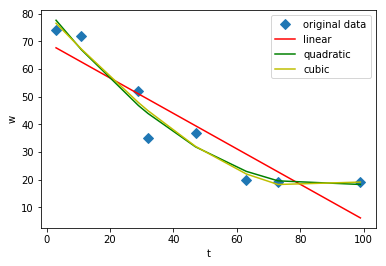

In [7]:
plt.plot(t, w, 'D', label='original data', markersize=7)
plt.plot(t, a1*t + b1, 'r', label='linear')
plt.plot(t, a2*t**2 + b2*t + c2, 'g', label='quadratic')
plt.plot(t, a3*t**3 + b3*t**2 + c3*t + d3, 'y', label='cubic')
plt.xlabel("t")
plt.ylabel("w")
plt.legend()
plt.show()

The quadratic polynomial captures a better trend of the data. Even though both quadratic and cubic appear to fit the data the same way, it's better to choose quadratic since it has fewer terms (unknowns) compared to cubic. 

## (b)
Compute the condition number of the associated Vandermonde matrix in each case.

In [8]:
print(np.linalg.cond(A1, p = 2))
print(np.linalg.cond(A2, p = 2))
print(np.linalg.cond(A3, p = 2))

95.9797884437621
10562.214789189069
1192946.8771486622


The vandermonde matrix becomes more ill conditioned as size increases.

----
# Exercise 2
Planets follow an elliptical orbit, which can be represented in a Cartesian $(x,y)$-coordinate system by the equation
$$ ay^2 + bxy + cx + dy + e = x^2. $$

## (a)
Use `numpy.linalg.lstsq()` to determine the orbital parameters $a,b,c,d,e$ for the table of observations given below.
In addition, plot the resulting orbit and the data points in the $(x,y)$-plane.

In [9]:
x = np.array([1.02, 0.95, 0.87, 0.77, 0.67, 0.56, 0.44, 0.30, 0.16, 0.01], dtype=np.float)
y = np.array([0.39, 0.32, 0.27, 0.22, 0.18, 0.15, 0.13, 0.12, 0.13, 0.15], dtype=np.float)

In [10]:
N = x.shape[0]

In [11]:
def equation(x, y):
    '''
    takes the input data and returns the respective 
    LHS-RHS w.r.t the given elliptic equation    
    '''
    RHS = x**2
    LHS = np.ones((N, 5))
    LHS[:, 0] = y**2
    LHS[:, 1] = x*y
    LHS[:, 2] = x
    LHS[:, 3] = y
    
    return LHS, RHS

In [12]:
def ABC(a, b, c, d, e, x):
    A = a
    B = b*x + d
    C = -x**2 + c*x + e
    return A, B, C

In [13]:
def determinant(A, B, C):
    '''
    roots of an equation: (-B ± √(B²-4AC))/2A
    '''
    root1 = (-B + np.sqrt(B**2 - 4*A*C))/(2*A)
    root2 = (-B - np.sqrt(B**2 - 4*A*C))/(2*A)    
    
    return (root1, root2)

In [14]:
def ellipse_contour(minX, maxX, minY, maxY):
    xlin = np.linspace(minX, maxX, 100)
    ylin = np.linspace(minY, maxY, 100)
    [X,Y] = np.meshgrid(xlin, ylin)
    Z = a*Y**2 + b*X*Y + c*X + d*Y + e - X**2
    return X, Y, Z

In [15]:
LHS, RHS = equation(x, y)

In [16]:
# orbital parameters: a, b, c, d, e respectively
a, b, c, d, e = np.linalg.lstsq(LHS, RHS, rcond=None)[0]

In [17]:
a, b, c, d, e

(-2.635625483712108,
 0.1436461825988934,
 0.5514469631403587,
 3.2229403381059,
 -0.4328942702644514)

In [18]:
A, B, C = ABC(a, b, c, d, e, x)

In [19]:
y1, y2 = determinant(A, B, C)

In [20]:
y1, y2

(array([0.38818562, 0.32384873, 0.2690847 , 0.21787281, 0.18011227,
        0.15058866, 0.13046193, 0.12132665, 0.12720981, 0.15128579]),
 array([0.89024315, 0.95076492, 1.00116881, 1.04693052, 1.07924089,
        1.10276931, 1.11635583, 1.11786086, 1.10434746, 1.07209622]))

In [21]:
# this range was selected manually after numerous trial and errors
minX = -0.55 #min(x)
maxX = 1.18 #max(x)
minY = 0 #min(y)
maxY = 1.25 #max(y)

In [22]:
X, Y, Z = ellipse_contour(minX, maxX, minY, maxY)

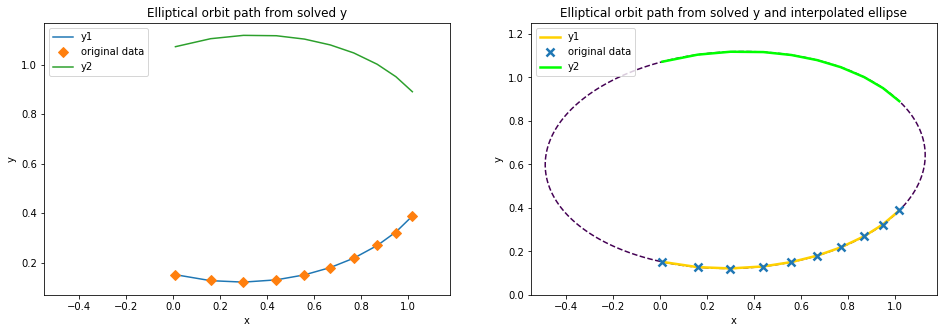

In [23]:
plt.rcParams["figure.figsize"] = (16, 5)
fig, ax = plt.subplots(1, 2, True)

ax[0].plot(x, y1, label = "y1")
ax[0].plot(x, y, 'D', label = "original data", markersize=7)
ax[0].plot(x, y2, label = "y2")
ax[0].set_xlabel("x")
ax[0].set_ylabel("y")
ax[0].set_title("Elliptical orbit path from solved y")
ax[0].legend()

ax[1].plot(x, y1, "#ffd100", label = "y1", linewidth=2.5)
ax[1].plot(x, y, "x", label = "original data", markersize=8, markeredgewidth=2.5)
ax[1].plot(x, y2, "#00ff00", label = "y2", linewidth=2.5)
ax[1].contour(X,Y,Z,[0], linestyles = "dashed")
ax[1].set_xlabel("x")
ax[1].set_ylabel("y")
ax[1].set_title("Elliptical orbit path from solved y and interpolated ellipse")
ax[1].legend()

plt.show()

## (b)
This least squares problem is nearly rank-deficient. To see what effect this has on the solution, perturb the input data slightly by adding random noise between -0.005 and 0.005 (using, for instance, `numpy.random.rand`), and solve the least squares problem with the perturbed data. Compare the new values for the parameters with those from (a). What effect does this difference have on the plot of the orbit?

In [24]:
noise = 0.01 * np.random.rand(N,) - 0.005

In [25]:
noise

array([ 0.0015359 , -0.00384993,  0.00450283, -0.00017809,  0.00372475,
       -0.00287667, -0.0045929 , -0.00102806, -0.00266868,  0.00341741])

In [26]:
x_perturb = x + noise
y_perturb = y + noise 

In [27]:
LHS_p, RHS_p = equation(x_perturb, y_perturb)

In [28]:
aa, bb, cc, dd, ee = np.linalg.lstsq(LHS_p, RHS_p, rcond = None)[0]

In [29]:
a, b, c, d, e

(-2.635625483712108,
 0.1436461825988934,
 0.5514469631403587,
 3.2229403381059,
 -0.4328942702644514)

In [30]:
aa, bb, cc, dd, ee

(-2.9437488221451384,
 0.6663088191187155,
 0.4922639314312506,
 2.809986196688716,
 -0.37209125026152234)

In [31]:
#difference between the parameters
(a-aa), (b-bb), (c-cc), (d-dd), (e-ee)

(0.30812333843303064,
 -0.5226626365198221,
 0.0591830317091081,
 0.41295414141718423,
 -0.06080302000292903)

In [32]:
AA, BB, CC = ABC(aa, bb, cc, dd, ee, x_perturb)

In [33]:
y_p1, y_p2 = determinant(AA, BB, CC)

In [34]:
y1==y_p1

array([False, False, False, False, False, False, False, False, False,
       False])

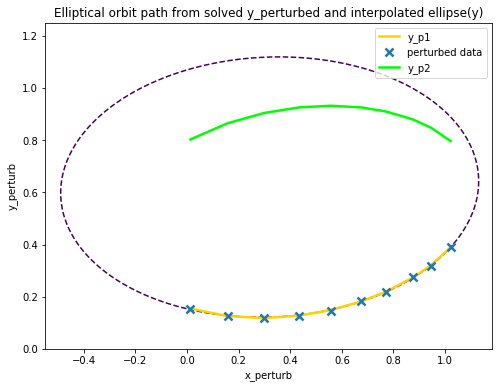

In [35]:
plt.rcParams["figure.figsize"] = (8, 6)

plt.plot(x_perturb, y_p1, "#ffd100", label = "y_p1", linewidth=2.5)
plt.plot(x_perturb, y_perturb, "x", label = "perturbed data", markersize=8, markeredgewidth=2.5)
plt.plot(x_perturb, y_p2, "#00ff00", label = "y_p2", linewidth=2.5)
plt.contour(X,Y,Z,[0], linestyles = "dashed")
plt.xlabel("x_perturb")
plt.ylabel("y_perturb")
plt.title("Elliptical orbit path from solved y_perturbed and interpolated ellipse(y)")
plt.legend()

plt.show()

## (c)
Can you explain this behaviour?

## (d)
Solve the same least squares problem again, for both the original *and* the perturbed data, this time using a routine specifically designed to deal with rank deficiencies. An example is `numpy.linalg.lstsq`, with the argument `rcond` as tolerance. Experiment with various tolerances, say $10^-k$ for $k \in \{1, ..., 5\}$. Compare the behaviour of the two solutions (one for the original input data, one for the perturbed data). How well do the resulting orbits fit the data points as the tolerance varies?